In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from scipy.io.arff import loadarff
from scipy.stats import ttest_rel
from sklearn.preprocessing import StandardScaler

# Load data
data = loadarff('data/pd_speech.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

X = df.drop('class', axis=1)
y = df['class']

In [2]:
# Create 10-fold stratified cross validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Create classifiers
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')
nb = GaussianNB()

knn_cm = np.zeros((2, 2))
nb_cm = np.zeros((2, 2))

knn_scores = np.array([])
nb_scores = np.array([])

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Normalize data
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    knn.fit(X_train, y_train)
    nb.fit(X_train, y_train)

    knn_pred = knn.predict(X_test)
    nb_pred = nb.predict(X_test)

    # used in the first question
    knn_cm += confusion_matrix(y_test, knn_pred)
    nb_cm += confusion_matrix(y_test, nb_pred)

    # used in the second question
    knn_scores = np.append(knn_scores, accuracy_score(y_test, knn_pred))
    nb_scores = np.append(nb_scores, accuracy_score(y_test, nb_pred))

In [3]:
def first():
  """Used to answer the first question"""
  def create_plot(axis, labels, title, cm):
    plot = sns.heatmap(cm, annot=labels, cmap='Blues', ax=axis, fmt='s')
    plot.set_title(title)
    plot.set_ylabel('Predicted')
    plot.set_xlabel('Real')
    return plot
  
  def label_heatmap(cm):
    return np.asarray(
      [f"{name}\n{count}" for name, count in zip(GROUP_NAMES, cm.flatten())]
    ).reshape(2, 2)
  
  GROUP_NAMES =['TN', 'FP', 'FN', 'TP']
  KNN_LABELS = label_heatmap(knn_cm)
  NB_LABELS = label_heatmap(nb_cm)
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
  p1 = create_plot(ax1, KNN_LABELS, 'KNN Confusion Matrix', knn_cm)
  p2 = create_plot(ax2, NB_LABELS, '(Gaussian) Naive Bayes Confusion Matrix', nb_cm)
  plt.show()
  # save the plot to a file
  fig.savefig('assets/hw2-2.1.png')

def second():
  """Used to answer the second question"""
  return ttest_rel(knn_scores, nb_scores, alternative='greater')

In [4]:
print('KNN accuracies with normalization:', knn_scores)
print('Naive Bayes accuracies with normalization:', nb_scores)

KNN accuracies with normalization: [0.89473684 0.86842105 0.90789474 0.81578947 0.89473684 0.81578947
 0.90666667 0.86666667 0.86666667 0.89333333]
Naive Bayes accuracies with normalization: [0.80263158 0.73684211 0.75       0.82894737 0.82894737 0.80263158
 0.89333333 0.77333333 0.72       0.82666667]


# First Programming Question

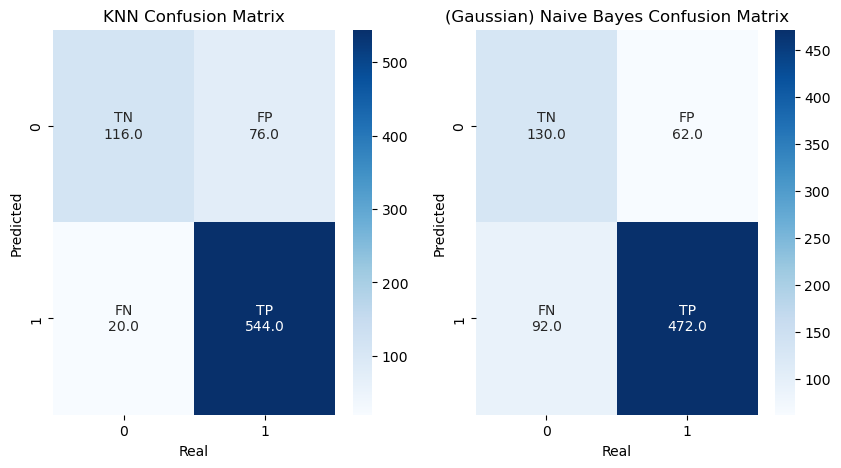

In [5]:
first()

# Second Programming Question

In [6]:
print(second())

Ttest_relResult(statistic=4.110857874643797, pvalue=0.001316817828490826)
